In [1]:
'''
===================================================
Notebook naming convention for FindMeInside (FMI)
===================================================
Notebook name: [FMI] <Coord/Label> Alg - Exp<experiment_number>, Trial<trial_number>

===================================================
Folder/File naming convention
===================================================
# Folder categorised by Experiment (except Testing folder)
Folder name: Experiment<Experiment_number>

# Each Folder has N files.
# A file is either a 1)Unprocessed Dataset, 2)Processed Dataset, 3)Results dataset, 4) Notebook file
# Each experiment has N trials. (Adjustments to parameters/algorithm are made in each trial)
Files in folder will be named accordingly...

- Raw data point:             E<experiment_number>_Label/Location<location_identifier>_<date>v<version_number>
-- e.g. E1_LabelA_230320v1
- Raw data collection:        E<experiment_number>_All_Raw_<date>v<version_number>
-- e.g. E1_All_Raw_230320v1
- Processed data (if any):    E<experiment_number>_All_Proc_<date>v<version_number>
-- e.g. E1_All_Proc_230320v1
- Resampled data (if any):    E<experiment_number>_resampled_t<trial_number>
-- e.g. E1_resampled_t1
- Results data:               E<experiment_number>_<algorithm>_t<trial_number>_k<number_of_neighbours>
-- e.g. E1_KNN_t1_k37

===================================================
List of experiment(s) & description(s)
===================================================
>> Experiment 1 (Exp1) :11 Sensors {1, ..., 11} , 4 Location Labels {A,B,C,D}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 2 (Exp2) :11 Sensors {1, ..., 11} , 4 Location Coords {(x_A, y_A), ... (x_D, y_D)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 11-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 11-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 3 (Exp3) : 12 Sensors {0x1, ..., 0xC} , 12 Location Label {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Label (Classification Model)

>> Experiment 4 (Exp4) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Resampled 12-Sensor RSSI Signature (100-x%)
>> Tested Data: Resampled 12-Sensor RSSI Signature (x%)
>> Output: Location Coords (Regression Model)

>> Experiment 5 (Exp5) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 6 (Exp6) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via Cypress BLE PC App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Resampled 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

>> Experiment 7 (Exp7) : 12 Sensors {0x1, ..., 0xC} , 12 Location Coords {(x_1,y_1), ... , (x_12, y_12)}
>> Data collected via FindMeInside Phone App
>> Trained Data: Averaged 12-Sensor RSSI Signature for 12 Locations
>> Tested Data: Averaged 12-Sensor RSSI Signature
>> Output: Location Coords (Regression Model)

'''
None

# Trial Description

In [142]:
exp = 5
trial = 1
'''
Trial 1
Algorithms use calcLocation mechanic
Resampling done within time period of 2s.
'''
None

# Core Libraries

In [143]:
import pandas as pd #from pandas import read_csv, pivot_table
import numpy as np
import math
import operator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import preprocessing

import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Exploratory Data Analysis

# Training & Test Sets

In [144]:
resampledDS = pd.read_csv('E5_resampled_T1.csv')
tempSeries = resampledDS['Location']
resampledDS = resampledDS.drop(columns=['Location'])
resampledDS["Location"] = tempSeries
resampledDS.head()
lastIndex = len(resampledDS)
numCol = len(resampledDS.columns)

ips_data = resampledDS.iloc[:lastIndex, :numCol-1]
# print(ips_data)
ips_labels = resampledDS.iloc[:lastIndex, numCol-1:]
# print(ips_labels)


# #dataset.iloc[rowrange, columnrange]
X = ips_data.to_numpy()
y = ips_labels.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size=0.3) 
y_train = y_train.reshape(len(y_train),)

k_value_rootN = math.ceil(math.sqrt(len(X_train)))
print("estimated k value: ", k_value_rootN)
print("X_test: ", X_test)
print("y_test: ", y_test)

estimated k value:  3
X_test:  [[177.        179.5412371 177.0430464 181.5261845 188.        179.9442971
  189.2653509 192.3333333 188.5889145 181.204918  190.6894273 184.1956522]
 [179.5366972 191.0541126 185.5274725 187.7090909 192.8294798 183.3042506
  178.9412998 177.7024129 179.6430108 177.0064103 180.0020619 181.1188341]
 [177.        177.9974359 178.8566434 178.9141104 180.4969136 188.4444444
  177.0091743 179.3349633 195.1928251 177.4652015 183.1703057 188.5068493]
 [193.2018141 189.4590164 183.5217391 182.9301746 177.5605536 177.
  177.3694581 177.7354839 177.        177.        177.        177.       ]]
y_test:  [['13,7']
 ['7,7']
 ['13,13']
 ['1,1']]


# Parameter Optimisation

# KNN Algorithm - Distance Calculation

In [145]:
n_samples = 2

#Function calculates euclidean distance between two n-dimensional data instances 
def euclideanDistance(instance1, instance2):
    #handles if instances are lists or tuples:
    instance1 = np.array(instance1) 
    instance2 = np.array(instance2)
    
    '''
    https://docs.scipy.org/doc/numpy/reference/generated/numpy.linalg.norm.html
    uses 2-norm frobenius norm and returns euclidean distance
    '''
    return np.linalg.norm(instance1 - instance2) #euclidean distance

# KNN Algorithm - Determining Neighbours

In [146]:
#Function finds nearest neighbours; nearest -> smallest euclidean distance
def get_neighbors(training_set, 
                  labels, 
                  test_instance, 
                  k, 
                  distance=euclideanDistance):
    """
    get_neighbors calculates a list of the k nearest neighbors
    of an instance 'test_instance'.
    The list neighbors contains 3-tuples with  
    (index, dist, label)
    where
    index    is the index from the training_set, 
    dist     is the distance between the test_instance and the 
             instance training_set[index]
    distance is a reference to a function used to calculate the 
             distances
    """
    distances = [] #empty distance array
    
    #calculates euclidean distance between test_instance and ALL other instances in training_set
    for index in range(len(training_set)):
        dist = euclideanDistance(test_instance, training_set[index])
        distances.append((training_set[index], dist, labels[index]))
    distances.sort(key=lambda x: x[1])
    neighbors = distances[:k]
    return neighbors # The list neighbors contains 3-tuples with (index, dist, label)

In [147]:
# Get Neighbours
outArray = []
for i in range(3):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_rootN, 
                              distance=euclideanDistance)
#     print(i,
#           X_test[i],
#           y_test[i],
#           neighbors)
    
    outArray.append([i,
          X_test[i],
          y_test[i],
          neighbors])

out_df = pd.DataFrame(outArray, columns=['i', 'X_test', 'y_test', 'neighbours'])
out_df.head()
# out_df.tail()

,i,X_test,y_test,neighbours
0,0,"[177.0, 179.54123710000002, 177.0430464, 181.5...","[13,7]","[([177.0, 177.0251046, 177.229765, 177.9952607..."
1,1,"[179.5366972, 191.0541126, 185.52747250000002,...","[7,7]","[([180.79909709999998, 193.4029536, 191.345991..."
2,2,"[177.0, 177.99743590000003, 178.85664340000002...","[13,13]","[([177.0, 177.0251046, 177.229765, 177.9952607..."


In [148]:
from collections import Counter
#LOC: outputs for each [x,y] in label, 
#     where (x_n1, y_n1) rep x and y coord of 1st neighbour resp
#     x_out = sum(x_n1, ... x_N) / N, where total neighbours = N
def calcLocation(neighbours): 
    x_out = 0
    y_out = 0
    totalNeighbours = len(neighbours)
    for neighbour in neighbours:
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
#         print("neighbour label: ", labeltuple)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb
        y_out += y_nb
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
    return ((x_out/totalNeighbours) , (y_out/totalNeighbours))
    


In [149]:
print("NON-WEIGHTED POSITION KNN\n")
k_value_knn = k_value_rootN
for i in range(2):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    print("calculalated location: ", calcLocation(neighbors))
    print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    print("----------------------------")

NON-WEIGHTED POSITION KNN

test location:  (13, 7)
calculalated location:  (13.0, 3.0)
distance error:  4.0
----------------------------
test location:  (7, 7)
calculalated location:  (5.0, 7.0)
distance error:  2.0
----------------------------


In [151]:
k_value_knn = k_value_rootN
writeKNN = True
fileNameKNN = 'E'+str(exp)+'_KNN_'+'T'+str(trial)+'_k'+str(k_value_knn)+'.csv'
resultsKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_knn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocation(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    locArray.append(calcLocation(neighbors))
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocation(neighbors)))


resultsKNN['index'] = indexArray
resultsKNN['data'] = dataArray
resultsKNN['pred_location'] = locArray
resultsKNN['label'] = labelArray 
resultsKNN['error'] = errorArray

if (writeKNN == True):
    resultsKNN.to_csv(fileNameKNN, index=False)
    print("File "+fileNameKNN+" has been written.")
resultsKNN.head(20)

File E5_KNN_T1_k3.csv has been written.


,index,data,pred_location,label,error
0,0,"[177.0, 179.54123710000002, 177.0430464, 181.5...","(13.0, 3.0)","13,7",4.000000
1,1,"[179.5366972, 191.0541126, 185.52747250000002,...","(5.0, 7.0)","7,7",2.000000
2,2,"[177.0, 177.99743590000003, 178.85664340000002...","(9.0, 11.0)","13,13",4.472136
3,3,"[193.20181409999998, 189.45901640000002, 183.5...","(3.0, 7.0)","1,1",6.324555


# Weighted KNN

In [136]:
'''
def calcLocationRankW(neighbours): 
    x_out = 0
    y_out = 0
    rank = 0
    for neighbour in neighbours:
        rank += 1
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
#         print("neighbour label: ", labeltuple)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb*(1/rank)
        y_out += y_nb*(1/rank)
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
    return ((x_out) , (y_out))
'''

'\ndef calcLocationRankW(neighbours): \n    x_out = 0\n    y_out = 0\n    rank = 0\n    for neighbour in neighbours:\n        rank += 1\n        # handle label (str) to tuple(int, int)\n        labeltuple = neighbour[2]\n        labeltuple = tuple(map(int, labeltuple.split(\',\')))\n#         print("neighbour label: ", labeltuple)\n        x_nb = labeltuple[0]\n        y_nb = labeltuple[1]\n#         print("x_nb: ", x_nb)\n#         print("y_nb: ", y_nb)\n        x_out += x_nb*(1/rank)\n        y_out += y_nb*(1/rank)\n#         print("x_out: ", x_out)\n#         print("y_out: ", y_out)\n    return ((x_out) , (y_out))\n'

In [137]:
"""
resultsRWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'label', 'vote_result', 'prediction'])

indexArray = []
dataArray = []
labelArray = []
voteArray = []
predArray = []

for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    print("calculalated location: ", calcLocationRankW(neighbors))
    print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))
    
# resultsRWKNN['index'] = indexArray
# resultsRWKNN['data'] = dataArray
# resultsRWKNN['label'] = labelArray
# resultsRWKNN['vote_result'] = voteArray
# resultsRWKNN['prediction'] = predArray


# resultsRWKNN.to_csv('./Datasets/Testing/RANKKNN_LOC.csv', index=False) 
# print("FILE WRITTEN")
# resultsRWKNN
"""


'\nresultsRWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=[\'index\', \'data\', \'label\', \'vote_result\', \'prediction\'])\n\nindexArray = []\ndataArray = []\nlabelArray = []\nvoteArray = []\npredArray = []\n\nfor i in range(len(X_test)):\n    neighbors = get_neighbors(X_train, \n                              y_train, \n                              X_test[i], \n                              k_value, \n                              distance=euclideanDistance)\n    \n    testPosTuple = tuple(map(int, y_test[i][0].split(\',\')))\n    print("test location: ", testPosTuple)\n    print("calculalated location: ", calcLocationRankW(neighbors))\n    print("distance error: ", euclideanDistance(testPosTuple, calcLocation(neighbors)))\n    \n# resultsRWKNN[\'index\'] = indexArray\n# resultsRWKNN[\'data\'] = dataArray\n# resultsRWKNN[\'label\'] = labelArray\n# resultsRWKNN[\'vote_result\'] = voteArray\n# resultsRWKNN[\'prediction\'] = predArray\n\n\n# resultsRWKNN.to_csv(\'./Datasets/T

# Distance Weighted KNN

In [152]:
def calcLocationDistW(neighbours): 
    x_out = 0
    y_out = 0
    total_dist = 0
#     cnt = 1
    for neighbour in neighbours:
#         print("Neighour #: ", cnt)
        # handle label (str) to tuple(int, int)
        labeltuple = neighbour[2]
        labeltuple = tuple(map(int, labeltuple.split(',')))
        # distance
        dist_nb = neighbour[1]
        total_dist += ( 1 / (1 if dist_nb == 0 else dist_nb) )
#         print("Neighbour distance: ", dist_nb)
#         print("Total distance: ", total_dist)
        x_nb = labeltuple[0]
        y_nb = labeltuple[1]
#         print("x_nb: ", x_nb)
#         print("y_nb: ", y_nb)
        x_out += x_nb*( 1 / (1 if dist_nb == 0 else dist_nb) )
        y_out += y_nb*( 1 / (1 if dist_nb == 0 else dist_nb) )
#         print("x_out: ", x_out)
#         print("y_out: ", y_out)
#         cnt += 1
    return ( (x_out/(1 if total_dist == 0 else total_dist)) ,
             (y_out/(1 if total_dist == 0 else total_dist)) )


In [153]:
k_value_dwknn = k_value_rootN
testRange = 3
# loops true each test record
for i in range(testRange):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
    print("test location: ", testPosTuple)
    calculatedLoc = calcLocationDistW(neighbors)
    print("calculalated location: ", calculatedLoc)
    print("distance error: ", euclideanDistance(testPosTuple, calculatedLoc))
    print("---------------------------------------------------------")

test location:  (13, 7)
calculalated location:  (13.689422495907879, 3.274703985924737)
distance error:  3.7885529916247562
---------------------------------------------------------
test location:  (7, 7)
calculalated location:  (4.960527102559606, 7.037519564700919)
distance error:  2.039817986274575
---------------------------------------------------------
test location:  (13, 13)
calculalated location:  (9.545609450540773, 10.82104482518502)
distance error:  4.084196337352822
---------------------------------------------------------


In [157]:
k_value_dwknn = k_value_rootN
writeDWKNN = True
fileNameDWKNN = 'E'+str(exp)+'_DWKNN_'+'T'+str(trial)+'_k'+str(k_value_dwknn)+'.csv'
resultsDWKNN = pd.DataFrame(0, index=range(len(X_test)), columns=['index', 'data', 'pred_location', 'label', 'error'])

indexArray = []
dataArray = []
locArray = []
labelArray = []
errorArray = []
for i in range(len(X_test)):
    neighbors = get_neighbors(X_train, 
                              y_train, 
                              X_test[i], 
                              k_value_dwknn, 
                              distance=euclideanDistance)
    
    testPosTuple = tuple(map(int, y_test[i][0].split(',')))
#     print("test location: ", testPosTuple)
#     print("calculalated location: ", calcLocationDistW(neighbors))
#     print("distance error: ", euclideanDistance(testPosTuple, calcLocationDistW(neighbors)))
    
    indexArray.append(i)
    dataArray.append(X_test[i])
    locArray.append(calcLocationDistW(neighbors))
    labelArray.append(y_test[i][0])
    errorArray.append(euclideanDistance(testPosTuple, calcLocationDistW(neighbors)))


resultsDWKNN['index'] = indexArray
resultsDWKNN['data'] = dataArray
resultsDWKNN['pred_location'] = locArray
resultsDWKNN['label'] = labelArray 
resultsDWKNN['error'] = errorArray

if (writeDWKNN == True):
    resultsDWKNN.to_csv(fileNameDWKNN, index=False)
    print("File "+fileNameDWKNN+" has been written.")
    
resultsDWKNN.head(20)

File E5_DWKNN_T1_k3.csv has been written.


,index,data,pred_location,label,error
0,0,"[177.0, 179.54123710000002, 177.0430464, 181.5...","(13.689422495907879, 3.274703985924737)","13,7",3.788553
1,1,"[179.5366972, 191.0541126, 185.52747250000002,...","(4.960527102559606, 7.037519564700919)","7,7",2.039818
2,2,"[177.0, 177.99743590000003, 178.85664340000002...","(9.545609450540773, 10.82104482518502)","13,13",4.084196
3,3,"[193.20181409999998, 189.45901640000002, 183.5...","(2.7306729986473037, 7.557016449132776)","1,1",6.781570


# Data Analysis via Visualisation

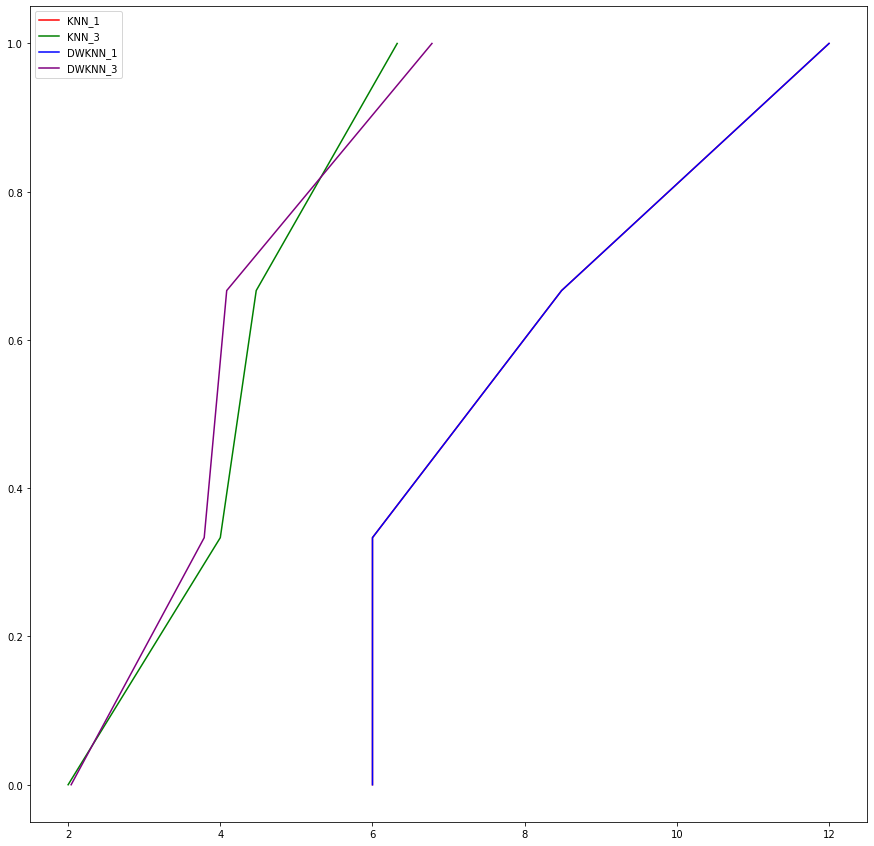

MEDIAN ERROR:
KNNcomp1      7.242641
KNNcomp2      4.236068
DWKNNcomp1    7.242641
DWKNNcomp2    3.936375
dtype: float64


In [159]:
fig= plt.figure(figsize=(15,15))
medErrorDf = pd.DataFrame(index = range(0,len(X_test)))

KNN_kcomp1 = pd.read_csv('E5_KNN_T1_k1.csv')
error = KNN_kcomp1['error']
medErrorDf['KNNcomp1'] = error
knn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp1_error),step=1)/(len(knn_kcomp1_error)-1)
## plotting    
plt.plot(knn_kcomp1_error,cdf, "red", label = "KNN_1")

KNN_kcomp2 = pd.read_csv('E5_KNN_T1_k3.csv')
error = KNN_kcomp2['error']
medErrorDf['KNNcomp2'] = error
knn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(knn_kcomp2_error),step=1)/(len(knn_kcomp2_error)-1)
## plotting    
plt.plot(knn_kcomp2_error,cdf, "green", label = "KNN_3")

DWKNN_kcomp1 = pd.read_csv('E5_DWKNN_T1_k1.csv')
error = DWKNN_kcomp1['error']
medErrorDf['DWKNNcomp1'] = error
dwknn_kcomp1_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp1_error),step=1)/(len(dwknn_kcomp1_error)-1)
## plotting    
plt.plot(dwknn_kcomp1_error,cdf, "blue", label = "DWKNN_1")

DWKNN_kcomp2 = pd.read_csv('E5_DWKNN_T1_k3.csv')
error = DWKNN_kcomp2['error']
medErrorDf['DWKNNcomp2'] = error
dwknn_kcomp2_error = np.sort(error)
cdf = np.arange(0,len(dwknn_kcomp2_error),step=1)/(len(dwknn_kcomp2_error)-1)
## plotting
plt.plot(dwknn_kcomp2_error,cdf, "purple", label = "DWKNN_3")

# additional plot params
plt.legend(loc='best', fontsize = 10)
plt.show()

print("MEDIAN ERROR:")
print(medErrorDf.median())
